## Building a classifier for intrusion detection system using the NSL KDD Dataset


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplcyberpunk
%matplotlib inline
plt.style.use('cyberpunk')
import scipy.stats as stats

## Data Preprocessing

In [2]:
train_path = '/Users/rudra_sarkar/Documents/Mtech Second Sem/Research Methodology/NSL-KDD/archive (2)/nsl-kdd/KDDTrain+.txt'
train_df = pd.read_csv(train_path, sep = ',', encoding = 'utf-8')

columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot',
            'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations',
            'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count',
            'serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
            'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
            'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
            'dst_host_srv_rerror_rate','attack','level'])
train_df.columns = columns
kdd_test_df = pd.read_csv('/Users/rudra_sarkar/Documents/Mtech Second Sem/Research Methodology/NSL-KDD/archive (2)/nsl-kdd/KDDTest+.txt', sep = ',', encoding = 'utf-8' )
kdd_test_df.columns = columns

merged_df = pd.concat([train_df, kdd_test_df], ignore_index = True)

In [3]:
len(kdd_test_df)

22543

In [4]:

merged_df.head(4)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.0,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.1,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.0,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21


In [5]:
print(f"The shape of the dataframe is {merged_df.shape}")

The shape of the dataframe is (148515, 43)


In [6]:
def check_null(df: pd.DataFrame):
    if sum(df.isna().sum()) == 0:
        return "0 null values present in the dataset"
    return f"{sum(df.isna().sum())} null values are present in the dataset"
print(check_null(merged_df))

0 null values present in the dataset


In [7]:
def find_numerical_features(df:pd.DataFrame):
    
    num_features = []
    for i in df.columns:
        if df.dtypes[i] == 'int' or df.dtypes[i] == 'float':
            num_features.append(i)
    return num_features

num_features = find_numerical_features(merged_df)
print(f"The numerical attributes of the dataset are : {num_features}")
print(f"Total number of numerical features is : {len(num_features)}")

The numerical attributes of the dataset are : ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'level']
Total number of numerical features is : 39


In [8]:
def find_categorical_features(df:pd.DataFrame):
    cat_features = []
    for col in df.columns:
        if df.dtypes[col] == 'object':
            cat_features.append(col)
    return cat_features

cat_features = find_categorical_features(merged_df)
print(f"The Categorical fetaures are : {cat_features}")
print(f"Total number of categorical features is : {len(cat_features)}")

The Categorical fetaures are : ['protocol_type', 'service', 'flag', 'attack']
Total number of categorical features is : 4


In [9]:
def label_encode_dataframe(df:pd.DataFrame, cat_features):
    df = df.copy()
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()

    for feature in cat_features:
        df[feature] = le.fit_transform(df[feature])
    return df

le_df = label_encode_dataframe(merged_df, cat_features)

## Feature Engineering 

In [17]:
df_2 = merged_df.copy()
for i in range(len(df_2)):
    if df_2['attack'].iloc[i]=='normal':
        df_2['attack'].iloc[i] = 0
    else:
        df_2['attack'].iloc[i] = 1

/var/folders/hm/zkw7hzv11y3_tq94hzdb87xw0000gn/T/ipykernel_1797/3836754276.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['attack'].iloc[i] = 0
/var/folders/hm/zkw7hzv11y3_tq94hzdb87xw0000gn/T/ipykernel_1797/3836754276.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['attack'].iloc[i] = 1


In [18]:
new_cat_features = ['protocol_type', 'service', 'flag']

In [19]:
le_df_binary = label_encode_dataframe(df_2, cat_features)
le_df_binary.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,2,44,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,0,15
1,0,1,49,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,1,19
2,0,1,24,9,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,0,21
3,0,1,24,9,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0,21
4,0,1,49,1,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,1,21
5,0,1,49,5,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.0,0.00,1,21
6,0,1,49,5,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.0,0.00,1,21
7,0,1,51,5,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.0,0.00,1,21
8,0,1,49,5,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.0,0.00,1,21
9,0,1,49,1,0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,0.00,0.00,1.0,1.00,1,21


In [20]:
data_bin = le_df_binary.copy()
data_bin.drop('duration', axis=1, inplace=True)
data_bin.drop('attack', axis=1, inplace=True)
data_bin.drop('num_outbound_cmds', axis = 1, inplace=True)

labels_bin = le_df_binary['attack']

data_bin = data_bin / data_bin.max()

In [21]:
data_bin = np.array(data_bin)
labels_bin = np.array(labels_bin).astype('float64')

In [22]:
X_train_bin, X_val_bin, X_test_bin = data_bin[:int(0.8*len(train_df))], data_bin[int(0.8*len(train_df)):len(train_df)], data_bin[len(train_df):]
y_train_bin, y_val_bin, y_test_bin = labels_bin[:int(0.8*len(train_df))], labels_bin[int(0.8*len(train_df)):len(train_df)], labels_bin[len(train_df):]

print(f"X_train : {X_train_bin.shape}, y_train : {y_train_bin.shape}")
print(f"X_val : {X_val_bin.shape}, y_val : {y_val_bin.shape}")
print(f"X_test : {X_test_bin.shape}, y_test : {y_test_bin.shape}")

X_train : (100777, 40), y_train : (100777,)
X_val : (25195, 40), y_val : (25195,)
X_test : (22543, 40), y_test : (22543,)


## Two sample Z test for the presence of Anomalies

<Axes: ylabel='Density'>

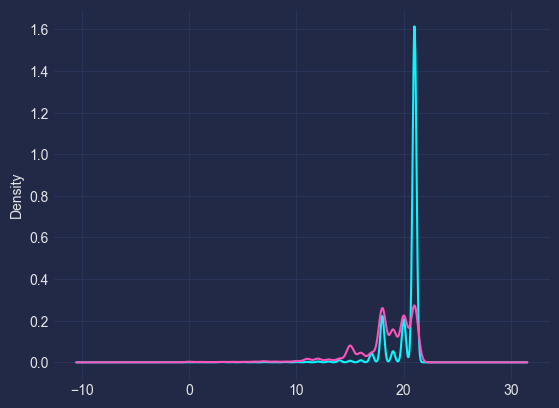

In [27]:
ax = df_2['level'].where(df_2['attack']==0).dropna().plot(kind='density')
df_2['level'].where(df_2['attack']==1).dropna().plot(kind='density', ax = ax)

In [28]:
norm_means = []
for i in range(1000):
    tmean = df_2['level'].where(df_2['attack']==0).dropna().sample(n=40).mean()
    norm_means.append(tmean)

In [29]:
ano_means = []
for i in range(1000):
    amean = df_2['level'].where(df_2['attack']==1).dropna().sample(n=40).mean()
    ano_means.append(amean)

<Axes: ylabel='Density'>

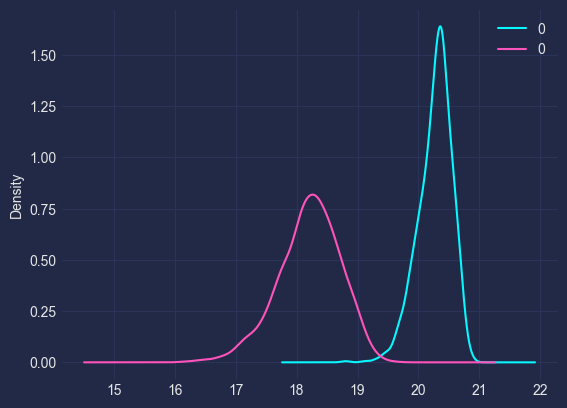

In [30]:
ax = pd.DataFrame(norm_means).plot(kind = 'density')
pd.DataFrame(ano_means).plot(kind = 'density', ax = ax)

In [40]:
std1 = df_2['level'].where(df_2['attack']==1).dropna().std()
std2 = df_2['level'].where(df_2['attack']==0).dropna().std()

mu_1bar = np.mean(ano_means)
mu_2bar = np.mean(norm_means)

n1 = n2 = 40

sig_level = 0.05

z_critical = abs(stats.norm.ppf(0.05))

z = (mu_2bar - mu_1bar)/np.sqrt((std1**2/n1)+(std2**2/n2))

if z<=z_critical:print("z < z_critical, failed to reject the null hypothesis")
else:print(f"z > z_critical , rejected null hypothesis, the probability of a type 1 error is {sig_level}")

z > z_critical , rejected null hypothesis, the probability of a type 1 error is 0.05


In [54]:
## Now we will check the power of the test
# if we assume the alternate hypothesis is true, then the new mu_diff = z_critical * np.sqrt((std1**2/n1)+(std2**2/n2))
mu_diff = z_critical * np.sqrt((std1**2/n1)+(std2**2/n2))

mu_a = abs(mu_1bar - mu_2bar)

z_alternate = abs(mu_diff - mu_a)/np.sqrt((std1**2/n1)+(std2**2/n2))

false_negative_probability = beta = 1 - stats.norm.cdf(z_alternate)

power_of_test = 1 - beta

print(f"Power of the two sample z test is {power_of_test*100:.2f}%")

Power of the two sample z test is 97.47%


## Random Forest Classifier

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report, roc_curve

rfc = RandomForestClassifier().fit(X_train_bin, y_train_bin)
rfc_preds = rfc.predict(X_test_bin)
rfc_pred_proba = rfc.predict_proba(X_test_bin)[::,1]


In [82]:
print(classification_report(y_test_bin, rfc_preds))

              precision    recall  f1-score   support

         0.0       0.72      0.97      0.83      9711
         1.0       0.97      0.72      0.83     12832

    accuracy                           0.83     22543
   macro avg       0.85      0.85      0.83     22543
weighted avg       0.86      0.83      0.83     22543



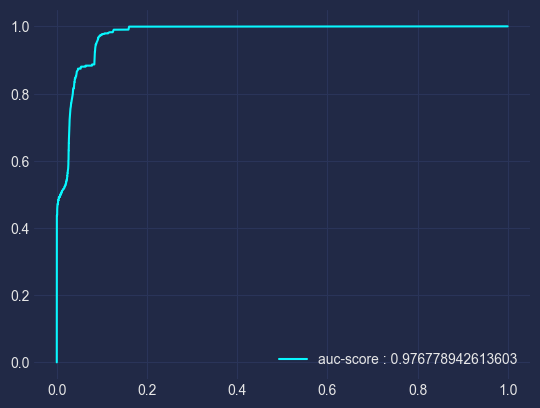

In [85]:
fpr_rfc, tpr_rfc , _ = roc_curve(y_test_bin, rfc_pred_proba)
auc_score_rfc = roc_auc_score(y_test_bin, rfc_pred_proba)
plt.plot(fpr_rfc, tpr_rfc, label = f"auc-score : {auc_score_rfc}")
plt.legend()

## Deep Neural Network 

In [55]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, Sequential
model2 = Sequential([
    layers.InputLayer(input_shape=(40,)),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(1, activation ='sigmoid')
])
model2.compile(loss = keras.losses.BinaryCrossentropy(from_logits=True), optimizer=keras.optimizers.legacy.Adam(1e-4, beta_1=5e-2), metrics = [tf.keras.metrics.F1Score(), 'accuracy', tf.keras.metrics.Recall() ],)

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-07-05 13:07:12.131129: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-05 13:07:12.131555: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


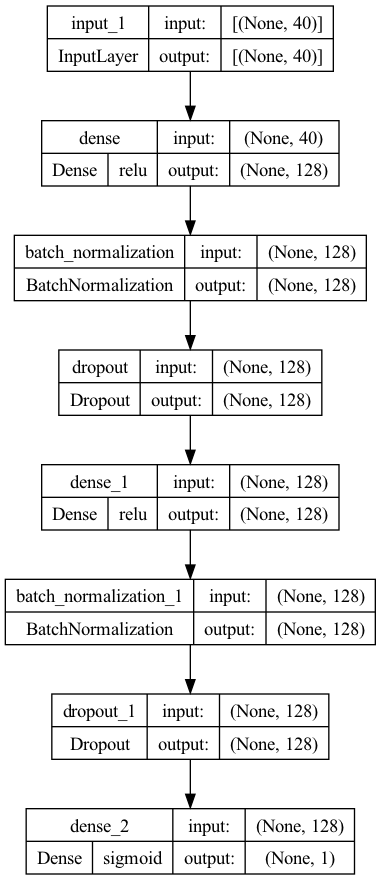

In [56]:
keras.utils.plot_model(model2, show_layer_names=True, show_shapes = True, show_layer_activations = True, expand_nested = True)

In [57]:
attack_detection_model_history = model2.fit(X_train_bin, y_train_bin, validation_data=(X_test_bin, y_test_bin), epochs = 10, shuffle = True)

Epoch 1/10


/Users/rudra_sarkar/tensorflow-test/env/lib/python3.10/site-packages/keras/src/backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-07-05 13:07:29.591670: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3150/3150 [==============================] - ETA: 0s - loss: 0.0764 - f1_score: 0.6350 - accuracy: 0.9728 - recall: 0.9681

2023-07-05 13:08:03.875354: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3150/3150 [==============================] - 38s 12ms/step - loss: 0.0764 - f1_score: 0.6350 - accuracy: 0.9728 - recall: 0.9681 - val_loss: 0.4441 - val_f1_score: 0.7255 - val_accuracy: 0.8626 - val_recall: 0.7824
Epoch 2/10
3150/3150 [==============================] - 36s 11ms/step - loss: 0.0261 - f1_score: 0.6350 - accuracy: 0.9915 - recall: 0.9911 - val_loss: 0.5093 - val_f1_score: 0.7255 - val_accuracy: 0.8655 - val_recall: 0.7874
Epoch 3/10
3150/3150 [==============================] - 36s 11ms/step - loss: 0.0188 - f1_score: 0.6350 - accuracy: 0.9939 - recall: 0.9938 - val_loss: 0.5666 - val_f1_score: 0.7255 - val_accuracy: 0.8615 - val_recall: 0.7817
Epoch 4/10
3150/3150 [==============================] - 36s 12ms/step - loss: 0.0152 - f1_score: 0.6350 - accuracy: 0.9948 - recall: 0.9951 - val_loss: 0.6858 - val_f1_score: 0.7255 - val_accuracy: 0.8488 - val_recall: 0.7583
Epoch 5/10
3150/3150 [==============================] - 36s 12ms/step - loss: 0.0129 - f1_score: 0.6350 - a

In [58]:
model2.evaluate(X_test_bin, y_test_bin)

705/705 [==============================] - 4s 6ms/step - loss: 0.7613 - f1_score: 0.7255 - accuracy: 0.8525 - recall: 0.7645


[0.7612874507904053,
 array([0.72548413], dtype=float32),
 0.8524597883224487,
 0.7644950151443481]

In [61]:
preds = model2.predict(X_test_bin)
preds = np.round(preds)
print(preds)

705/705 [==============================] - 2s 3ms/step
[[1.]
 [0.]
 [1.]
 ...
 [1.]
 [0.]
 [1.]]


In [65]:

print(classification_report(y_test_bin, preds))

              precision    recall  f1-score   support

         0.0       0.76      0.97      0.85      9711
         1.0       0.97      0.76      0.86     12832

    accuracy                           0.85     22543
   macro avg       0.86      0.87      0.85     22543
weighted avg       0.88      0.85      0.85     22543



705/705 [==============================] - 2s 2ms/step


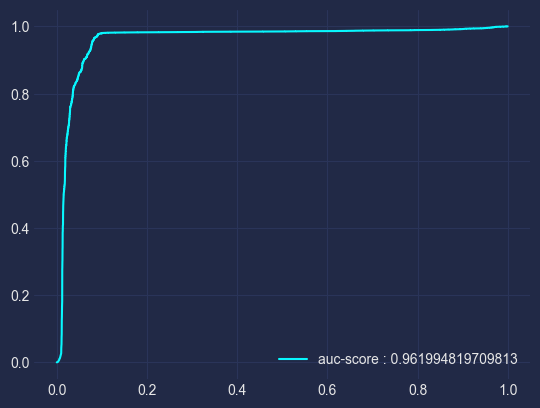

In [78]:
pred_prob = model2.predict(X_test_bin)
fpr, tpr, _ = roc_curve(y_test_bin, pred_prob)
auc_score = roc_auc_score(y_test_bin, pred_prob)
plt.plot(fpr, tpr, label = f"auc-score : {auc_score}")
plt.legend()